# EDA - Analisis exploratorio de datos

- Analisis de dataset originales
- Preprocesamiento
    - Limpieza de dataset
    - Armado de datasets para entrenamiento
        - Muestras totales (unitarias, por segundo y por minuto)
        - Muestras por especimen (unitarias, por segundo y por minuto)
- Analisis de datasets resultantes

In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

Dependiendo del kernel de python que estemos usando, esta bueno chequear si estamos corriendo en la maquina local, el contenedor de docker con jupyter u otro server remoto. 

In [2]:
!whoami
!pwd

jovyan
/home/jovyan


Si estamos corriendo con el contenedor que se crea con este repo, tenemos que movernos a la ubicación del repo, en este caso usando el comando magico %cd.

In [3]:
%cd meleros/notebooks/

/home/jovyan/meleros/notebooks


## Lectura de datasets originales

Partimos de 2 datasets originales, primero vamos a revisar la forma de ambos programaticamente:
- Head: primeras lineas
- Shape: Tamaño del dataframe

In [4]:
dataset1_path = "../data/0-cruda/estudio3.csv"
dataset1_crudo_dataframe = pd.read_csv(dataset1_path)

dataset2_path = "../data/0-cruda/tabla-resumen.csv"
dataset2_crudo_dataframe = pd.read_csv(dataset2_path)


In [5]:
dataset1_crudo_dataframe.head()

,UE,Nombre,Sexo,Etapa,Hora,Tiempo,X,Y,Z,Estado,Comportamiento,ODBA
0,6,Matilda,Hembra,A1,20:00.0,1,0.0000,-0.5469,0.8125,I,D,0.014043
1,6,Matilda,Hembra,A1,20:00.1,1,-0.0156,-0.5469,0.8281,I,D,0.020277
2,6,Matilda,Hembra,A1,20:00.2,1,0.0000,-0.5469,0.7969,I,D,0.029643
3,6,Matilda,Hembra,A1,20:00.3,1,-0.0156,-0.5469,0.8125,I,D,0.011963
4,6,Matilda,Hembra,A1,20:00.4,1,0.0000,-0.5469,0.8125,I,D,0.014043


In [6]:
dataset2_crudo_dataframe.head()

,UE,Nombre,Sexo,Fecha,Hora,Estado,Comportamiento,Comport 2,Posición,x,...,x prom/3seg,y prom/3seg,z prom/3seg,dif x,dif y,dif z,abs dif x,abs dif y,abs dif z,ODBA
0,1,Chaqueña,Hembra,8/22/2019,25:28.0,A,E,E,C,0.1250,...,0.117717,0.1948,0.914077,0.007283,0.0708,-0.023477,0.007283,0.0708,0.023477,0.101560
1,1,Chaqueña,Hembra,8/22/2019,25:28.1,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0708,-0.039077,0.008317,0.0708,0.039077,0.118193
2,1,Chaqueña,Hembra,8/22/2019,25:28.2,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0708,-0.007777,0.008317,0.0708,0.007777,0.086893
3,1,Chaqueña,Hembra,8/22/2019,25:28.3,A,E,E,C,0.1094,...,NaN,NaN,NaN,-0.008317,0.0552,0.007823,0.008317,0.0552,0.007823,0.071340
4,1,Chaqueña,Hembra,8/22/2019,25:28.4,A,E,E,C,0.1719,...,NaN,NaN,NaN,0.054183,0.0396,0.007823,0.054183,0.0396,0.007823,0.101607


In [7]:
# Revisar nombres de columnas
dataset1_crudo_dataframe.columns.to_list()

['UE',
 'Nombre',
 'Sexo',
 'Etapa',
 'Hora',
 'Tiempo',
 'X',
 'Y',
 'Z',
 'Estado',
 'Comportamiento',
 'ODBA']

In [8]:
dataset2_crudo_dataframe.columns.to_list()

['UE',
 'Nombre',
 'Sexo',
 'Fecha',
 'Hora',
 'Estado',
 'Comportamiento',
 'Comport 2',
 'Posición',
 'x',
 'y',
 'z',
 'x prom/3seg',
 'y prom/3seg',
 'z prom/3seg',
 'dif x',
 'dif y ',
 'dif z',
 'abs dif x',
 'abs dif y ',
 'abs dif z ',
 'ODBA']

In [9]:
dataset1_crudo_dataframe.shape


(466560, 12)

In [10]:
dataset2_crudo_dataframe.shape

(119030, 22)

In [11]:
dataset1_crudo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466560 entries, 0 to 466559
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UE              466560 non-null  int64  
 1   Nombre          466560 non-null  object 
 2   Sexo            466560 non-null  object 
 3   Etapa           466560 non-null  object 
 4   Hora            466560 non-null  object 
 5   Tiempo          466560 non-null  int64  
 6   X               466560 non-null  float64
 7   Y               466560 non-null  float64
 8   Z               466560 non-null  float64
 9   Estado          466559 non-null  object 
 10  Comportamiento  466559 non-null  object 
 11  ODBA            466560 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 42.7+ MB


In [12]:
dataset2_crudo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119030 entries, 0 to 119029
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UE              119030 non-null  int64  
 1   Nombre          119030 non-null  object 
 2   Sexo            119030 non-null  object 
 3   Fecha           119030 non-null  object 
 4   Hora            119030 non-null  object 
 5   Estado          119030 non-null  object 
 6   Comportamiento  119020 non-null  object 
 7   Comport 2       119020 non-null  object 
 8   Posición        119030 non-null  object 
 9   x               119030 non-null  float64
 10  y               119030 non-null  float64
 11  z               119030 non-null  float64
 12  x prom/3seg     3968 non-null    float64
 13  y prom/3seg     3968 non-null    float64
 14  z prom/3seg     3968 non-null    float64
 15  dif x           119030 non-null  float64
 16  dif y           119030 non-null  float64
 17  dif z     

In [13]:
dataset1_crudo_dataframe.describe()

,UE,Tiempo,X,Y,Z,ODBA
count,466560.00000,466560.000000,466560.000000,466560.000000,466560.000000,466560.000000
mean,5.50000,144.500000,0.205897,-0.197764,0.540138,0.076477
std,2.81366,83.138027,0.307815,0.502086,0.494675,0.136346
min,2.00000,1.000000,-1.500000,-2.875000,-3.468800,0.000047
25%,3.00000,72.750000,0.015600,-0.593800,0.359400,0.017673
50%,5.00000,144.500000,0.234400,-0.203100,0.750000,0.027037
75%,8.00000,216.250000,0.390600,0.140600,0.890600,0.051567
max,10.00000,288.000000,1.750000,1.578100,5.250000,8.062487


In [14]:
dataset2_crudo_dataframe.describe()

,UE,x,y,z,x prom/3seg,y prom/3seg,z prom/3seg,dif x,dif y,dif z,abs dif x,abs dif y,abs dif z,ODBA
count,119030.000000,119030.000000,119030.000000,119030.000000,3968.000000,3968.000000,3968.000000,1.190300e+05,1.190300e+05,1.190300e+05,119030.000000,119030.000000,119030.000000,119030.000000
mean,5.502310,0.278723,-0.023097,0.669473,0.278663,-0.023176,0.669728,1.097118e-18,2.355132e-19,1.271771e-18,0.064500,0.076805,0.063634,0.204939
std,2.904318,0.422830,0.336086,0.348745,0.408476,0.313718,0.330369,1.096109e-01,1.209401e-01,1.129497e-01,0.088624,0.093421,0.093319,0.216879
min,1.000000,-2.000000,-2.125000,-7.296900,-0.994280,-1.018233,-0.691680,-1.748943e+00,-2.248437e+00,-8.158363e+00,0.000000,0.000000,0.000000,0.001063
25%,3.000000,0.015600,-0.281300,0.484400,0.040109,-0.268242,0.498581,-3.226667e-02,-4.008667e-02,-3.175667e-02,0.010900,0.012027,0.013053,0.054710
50%,6.000000,0.203100,-0.031300,0.812500,0.204443,-0.037527,0.822150,5.200000e-04,0.000000e+00,4.333333e-05,0.031778,0.040120,0.032327,0.135943
75%,8.000000,0.625000,0.218800,0.921900,0.613554,0.212777,0.908344,3.128000e-02,4.014583e-02,3.285333e-02,0.081786,0.108900,0.077103,0.282347
max,10.000000,2.328100,3.234400,5.046900,1.012520,0.945320,1.059917,1.992150e+00,3.110963e+00,3.986983e+00,1.992150,3.110963,8.158363,12.413090


In [15]:
# Chequear valores nulos dataset 1
dataset1_crudo_dataframe.isnull().sum()

UE                0
Nombre            0
Sexo              0
Etapa             0
Hora              0
Tiempo            0
X                 0
Y                 0
Z                 0
Estado            1
Comportamiento    1
ODBA              0
dtype: int64

In [16]:
# Chequear valores nulos dataset 2
dataset2_crudo_dataframe.isnull().sum()

UE                     0
Nombre                 0
Sexo                   0
Fecha                  0
Hora                   0
Estado                 0
Comportamiento        10
Comport 2             10
Posición               0
x                      0
y                      0
z                      0
x prom/3seg       115062
y prom/3seg       115062
z prom/3seg       115062
dif x                  0
dif y                  0
dif z                  0
abs dif x              0
abs dif y              0
abs dif z              0
ODBA                   0
dtype: int64

In [17]:
# Chequear valores unicos dataset 1
dataset1_crudo_dataframe.nunique()

UE                     6
Nombre                 6
Sexo                   2
Etapa                  3
Hora                1083
Tiempo               288
X                    158
Y                    158
Z                    206
Estado                 2
Comportamiento        12
ODBA              116897
dtype: int64

In [18]:
# Chequear valores unicos dataset 2
dataset2_crudo_dataframe.nunique()

UE                   10
Nombre               10
Sexo                  2
Fecha                 5
Hora              35700
Estado                2
Comportamiento       10
Comport 2             7
Posición              9
x                   151
y                   152
z                   179
x prom/3seg        3368
y prom/3seg        3444
z prom/3seg        2830
dif x             25492
dif y             28505
dif z             24145
abs dif x         18447
abs dif y         20023
abs dif z         18152
ODBA              57669
dtype: int64

### Notas

#### Dataset 1 - estudio3

- Pareciera ser el original crudo
- Mas muestras: (466560, 12)
- Menos columnas
    - Datos de interes: Nombre, Sexo, X, Y, Z,  Comportamiento (salida) y ODBA.
    - 12 tipos de comportamiento de salida

#### Dataset 2 - tabla-resumen

- Pareciera ser el dataset curado para el estudio con excel
- Menos muestras: (119030, 22)
- Mas columnas
    - Tiene un segundo comportamiento y promedios de los últimos 3 segundos de las lecturas del acelerometro. 
    - 10 tipos de comportamientos de salida


In [19]:
# Verificar valores de la columna Comportamiento para ambos datasets
dataset1_crudo_dataframe['Comportamiento'].unique().tolist()

['D', 'E', 'AL', 'O', 'IM', 'AA', 'NV', 'L', 'LD', 'LA', 'LI', 'LR', nan]

In [20]:
dataset2_crudo_dataframe['Comportamiento'].unique().tolist()

['E', 'TD', 'IM', 'L', 'AA', 'TA', nan, 'OTROS', 'I', 'AL', 'A']

In [21]:
dataset1_crudo_dataframe['Nombre'].unique().tolist()

['Matilda', 'Maíz', 'Franco', 'Isabella', 'Garrita', 'Salvaje']

In [22]:
dataset2_crudo_dataframe['Nombre'].unique().tolist()

['Chaqueña',
 'Franco',
 'Garrita',
 'Inti',
 'Isabella',
 'Luz',
 'Maíz',
 'Matilda',
 'Salvaje',
 'Tucumano']

In [23]:
# Revisar si la columna inti repetida tiene los mismos datos

dataframe_inti = dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']=='Inti']
dataframe_inti_ = dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']=='Inti ']

# Borrar columna nombre de ambos dataframes
dataframe_inti = dataframe_inti.drop(columns=['Nombre'])
dataframe_inti_ = dataframe_inti_.drop(columns=['Nombre'])

# Comparar ambos dataframes
print(dataframe_inti.equals(dataframe_inti_))

False


In [24]:
# Numero de muestras por nombre en dataset 1
dataset1_crudo_dataframe['Nombre'].value_counts()

Nombre
Matilda     77760
Maíz        77760
Franco      77760
Isabella    77760
Garrita     77760
Salvaje     77760
Name: count, dtype: int64

In [25]:
dataset2_crudo_dataframe['Nombre'].value_counts()

Nombre
Chaqueña    14600
Luz         13920
Inti        13080
Maíz        13040
Matilda     12400
Franco      12270
Tucumano    11830
Salvaje     11650
Garrita     10650
Isabella     5590
Name: count, dtype: int64

In [ ]:
dataset1_crudo_dataframe['Comportamiento'].value_counts()

In [ ]:
dataset2_crudo_dataframe['Comportamiento'].value_counts()

## Analisis detallado

### Datos categóricos

#### Graficos
- Muestras por especimen
- Muestras por sexo
- Muestras por comportamiento
- Muestras por especimen por comportamiento

Text(0.5, 1.0, 'Dataset 2 - tabla-resumen.csv')

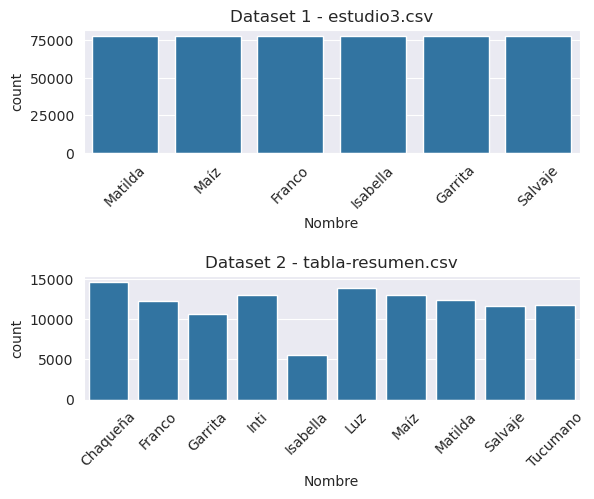

In [26]:
# Count plot of the column Name in dataset 1 an 2
fig, axes = plt.subplots(2, 1)

sns.countplot(x='Nombre', data=dataset1_crudo_dataframe, ax=axes[0])
sns.countplot(x='Nombre', data=dataset2_crudo_dataframe, ax=axes[1])

# Adjust vertical spacing between the plots
plt.subplots_adjust(hspace=1)

# Rotate x-axis labels
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Set the title for the plots
axes[0].set_title('Dataset 1 - estudio3.csv')
axes[1].set_title('Dataset 2 - tabla-resumen.csv')


Se vuelve a apreciar visualmente que el dataset 1 parece estar mas crudo que el dataset 2. Se procede a comparar los numeros de muestras para los especímenes que coinciden en ambos datasets.

<Axes: xlabel='Nombre', ylabel='count'>

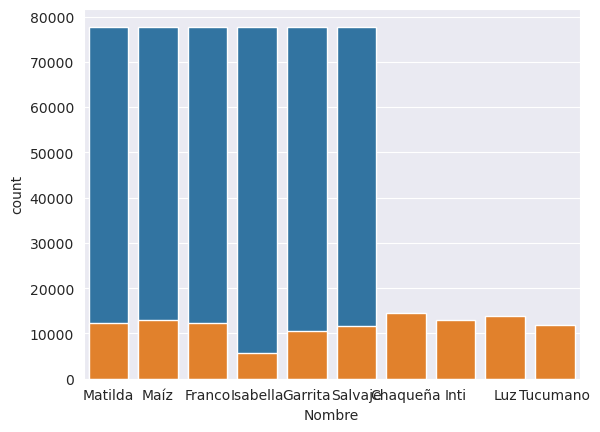

In [27]:
# Plot counts for each specimen in dataset 1 and compare with dataset 2
sns.countplot(x='Nombre', data=dataset1_crudo_dataframe)
sns.countplot(x='Nombre', data=dataset2_crudo_dataframe)



<Axes: xlabel='Sexo', ylabel='count'>

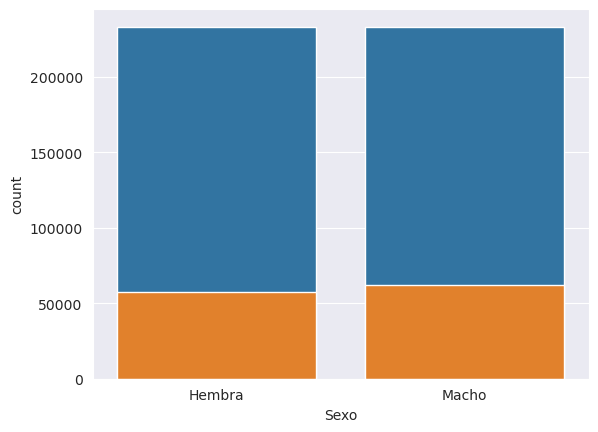

In [28]:
# Plot de muestras por sexo
sns.countplot(x='Sexo', data=dataset1_crudo_dataframe)
sns.countplot(x='Sexo', data=dataset2_crudo_dataframe)


In [29]:
dataset1_crudo_dataframe['Sexo'].value_counts()

Sexo
Hembra    233280
Macho     233280
Name: count, dtype: int64

In [30]:
dataset2_crudo_dataframe['Sexo'].value_counts()

Sexo
Macho     61870
Hembra    57160
Name: count, dtype: int64

Text(0.5, 1.0, 'Dataset 2 - tabla-resumen.csv')

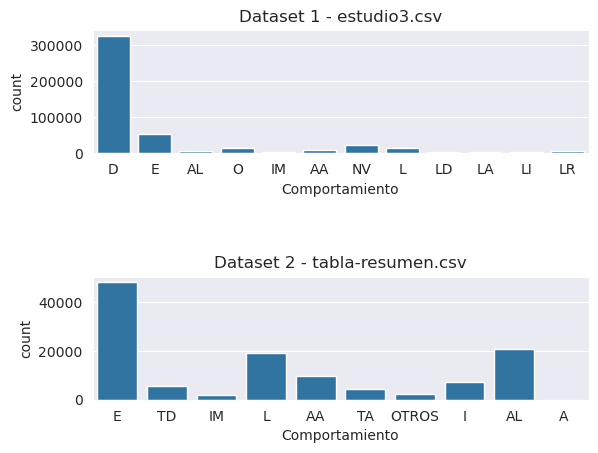

In [31]:
# Count plot of the column Name in dataset 1 an 2
fig, axes = plt.subplots(2, 1)

sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe, ax=axes[0])
sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe, ax=axes[1])

# Adjust vertical spacing between the plots
plt.subplots_adjust(hspace=1)

# Set the title for the plots
axes[0].set_title('Dataset 1 - estudio3.csv')
axes[1].set_title('Dataset 2 - tabla-resumen.csv')


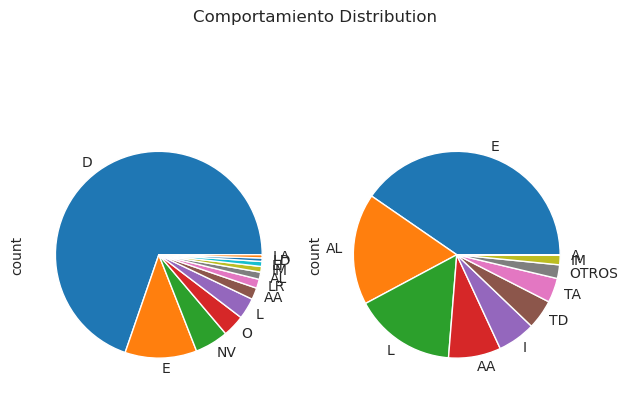

In [32]:
# Create a pie chart for dataset 1
plt.subplot(1, 2, 1)
dataset1_crudo_dataframe['Comportamiento'].value_counts().plot.pie()

# Create a pie chart for dataset 2
plt.subplot(1, 2, 2)
dataset2_crudo_dataframe['Comportamiento'].value_counts().plot.pie()

# Set the title for the plots
plt.suptitle('Comportamiento Distribution')

# Adjust the layout
plt.tight_layout()


<Axes: xlabel='Comportamiento', ylabel='count'>

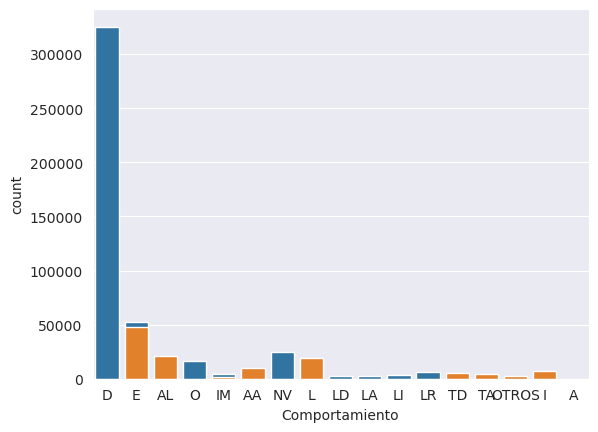

In [33]:
# Plot counts for each specimen in dataset 1 and compare with dataset 2
sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe)
sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe)

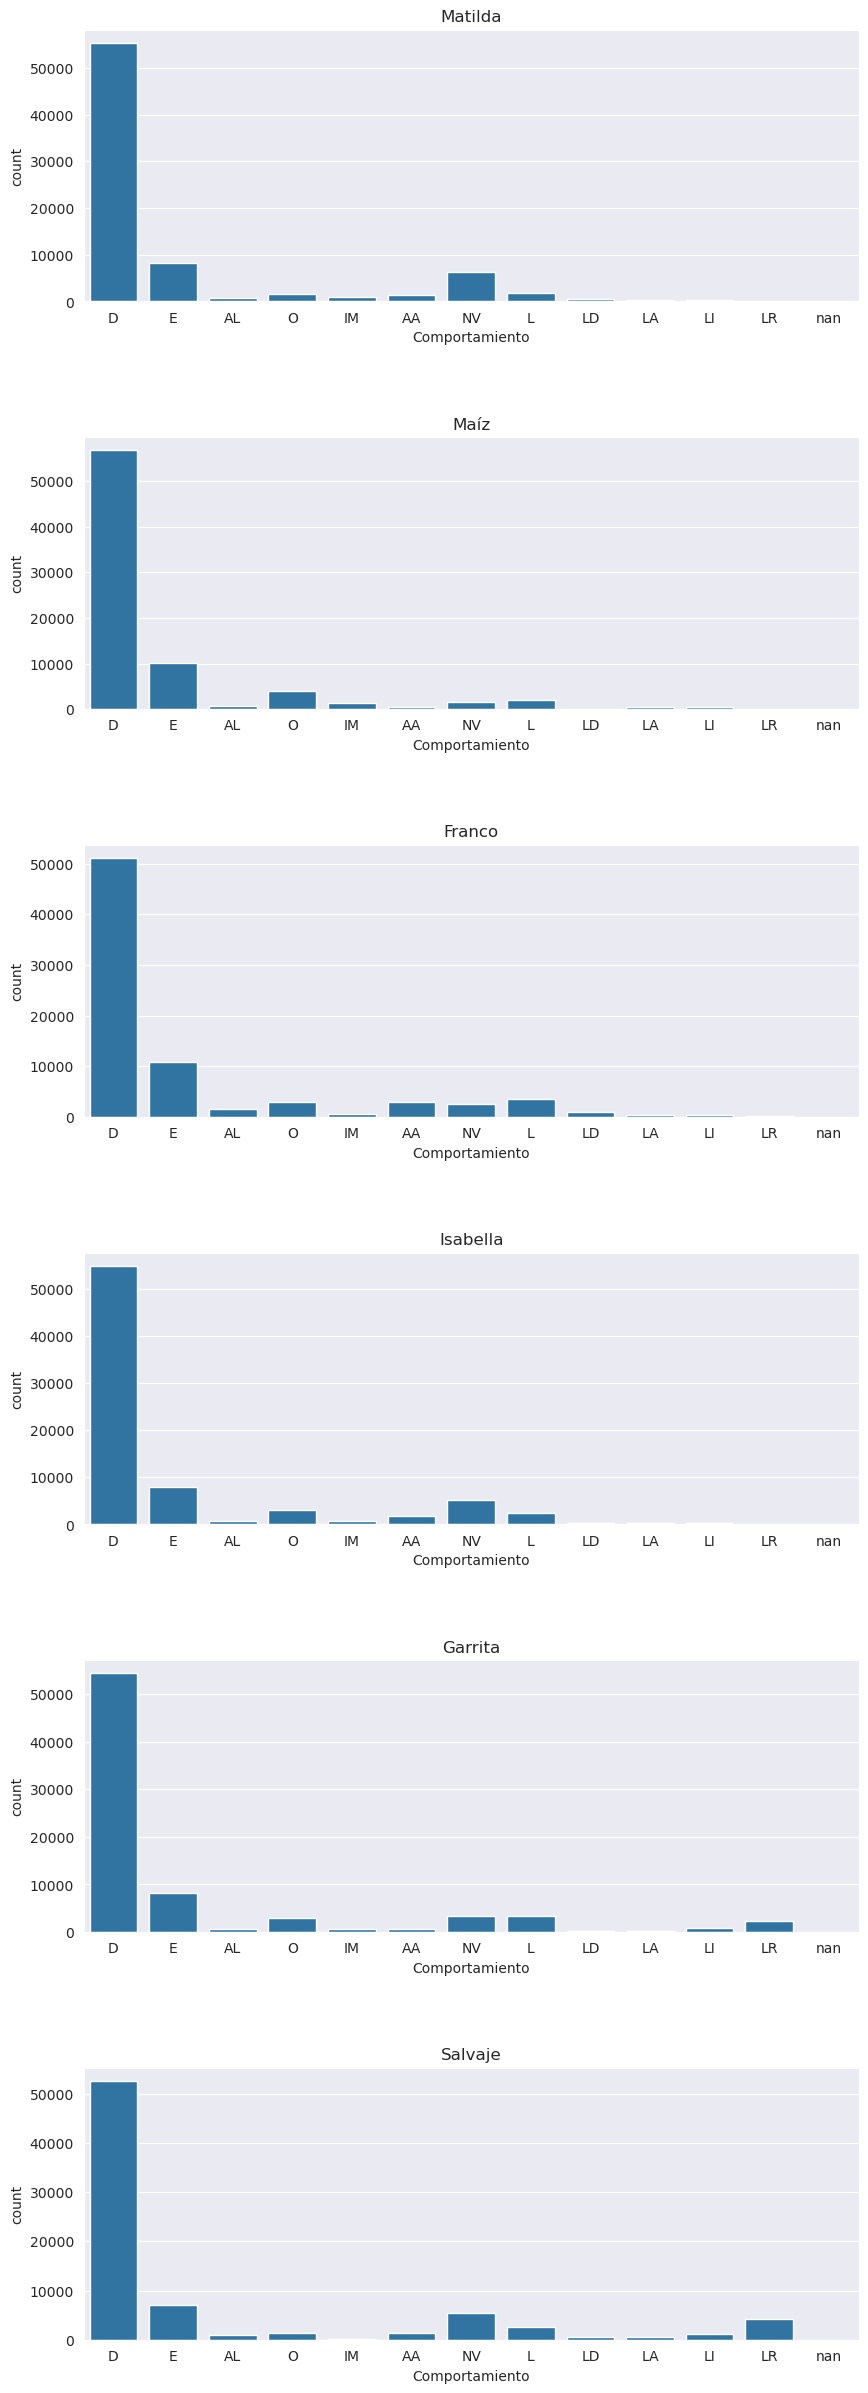

In [34]:
# Distribución de comportamientos por especimen: Dataset 1
nombres = dataset1_crudo_dataframe['Nombre'].unique().tolist()

fig, axes = plt.subplots(len(nombres), 1, figsize=(10, len(nombres)*5))

plt.subplots_adjust(hspace=0.5)

comportamiento_order = dataset1_crudo_dataframe['Comportamiento'].unique().tolist()

for i, nombre in enumerate(nombres):
    sns.countplot(x='Comportamiento', data=dataset1_crudo_dataframe[dataset1_crudo_dataframe['Nombre']==nombre], ax=axes[i], order=comportamiento_order)
    axes[i].set_title(nombre)

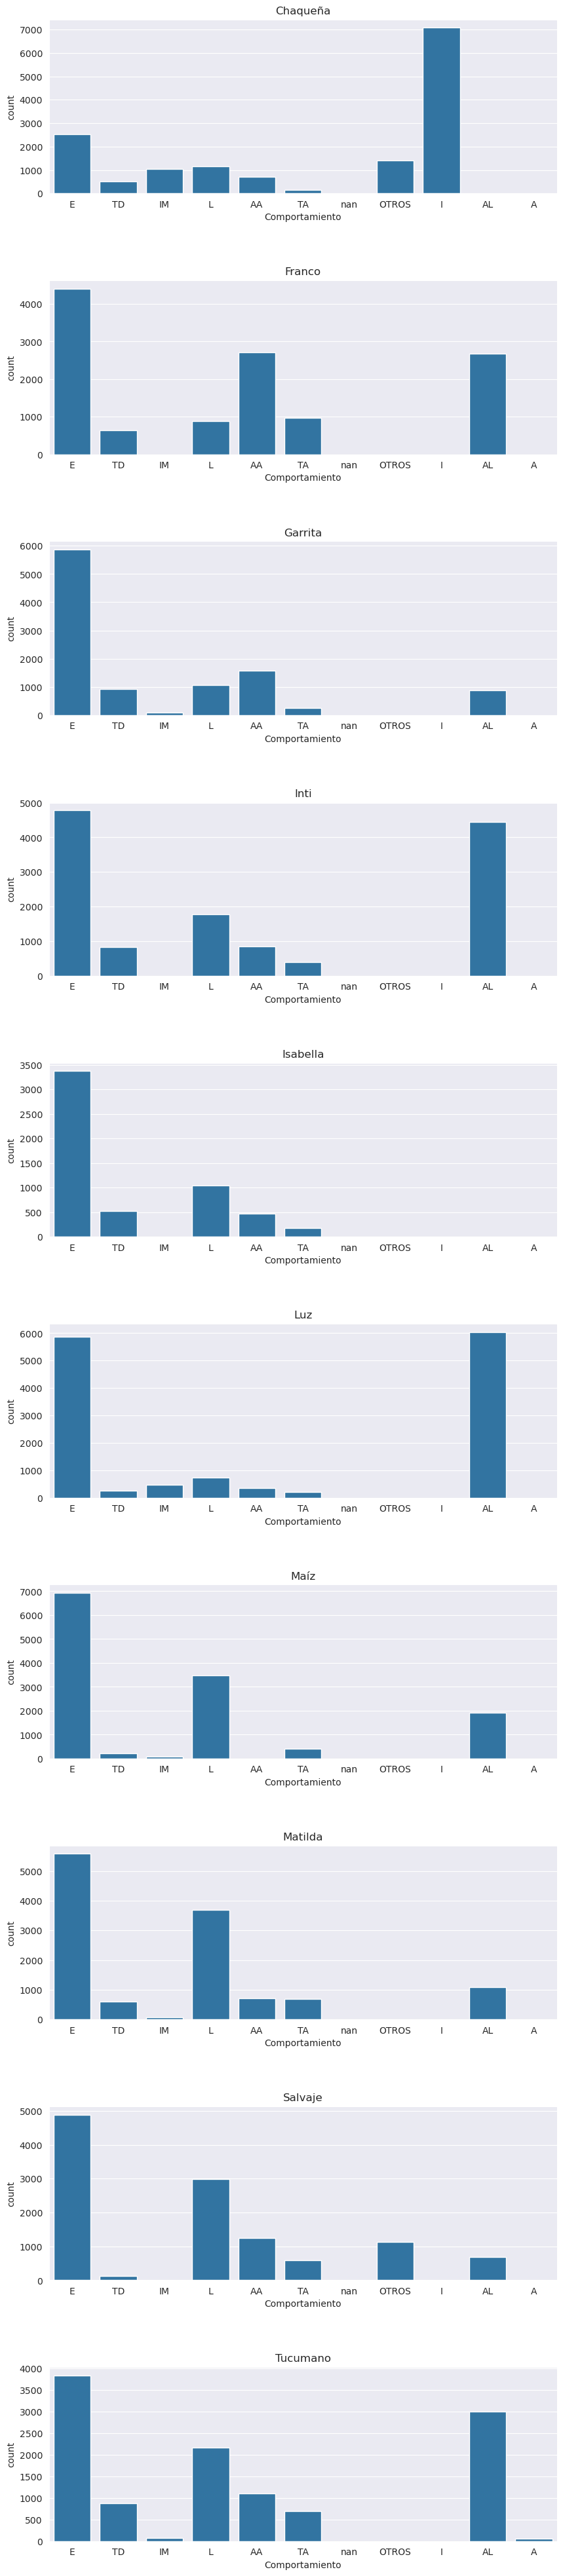

In [35]:
# Distribución de comportamientos por especimen: Dataset 1
nombres = dataset2_crudo_dataframe['Nombre'].unique().tolist()

fig, axes = plt.subplots(len(nombres), 1, figsize=(10, len(nombres)*5))

plt.subplots_adjust(hspace=0.5)

comportamiento_order = dataset2_crudo_dataframe['Comportamiento'].unique().tolist()

for i, nombre in enumerate(nombres):
    sns.countplot(x='Comportamiento', data=dataset2_crudo_dataframe[dataset2_crudo_dataframe['Nombre']==nombre], ax=axes[i], order=comportamiento_order)
    axes[i].set_title(nombre)

#### Conclusiones

- Especimenes
    - Dataset 1 muestra datos repartidos igualmente entre menor cantidad de especímenes
    - Dataset 2 muestra mas especímenes, pero con numero de muestras variable, entre las 5590 y los 14050 dependiendo el especímen.

- Sexo: El dataset esta bastante equilibrado en ambos casos.

- Comportamiento: Es la variable de estudio mas importante, salida cuya clasificación queremos que puedan predecir nuestros modelos. Es evidente que en cuanto a muestras por comportamiento todo el dataset esta desequilibrado.
    - El dataset 1 contiene una cantidad desproporcionada de muestras con los especímenes en descanso. 
    - En el caso del dataset 2, el comportamiento dominantes es E, de exploración, que indica que el animal esta despierto, alerta y con un cierto nivel de actividad.


### Datos numéricos

Los datos numéricos de entrada para nuestros modelos seran las variables X, Y, Z y ODBA. Se procede al análisis exploratorio de las variables relevantes en los formatos:

- Univariable
    - Kernel plot por variable numérica: Sesgos
    - Box plot por variable numérica: Rangos comunes
- Box plot por variable num comportamiento por dataset
- Violin plot por comportamiento por dataset

#### Kernel plot


(0.0, 3.0)

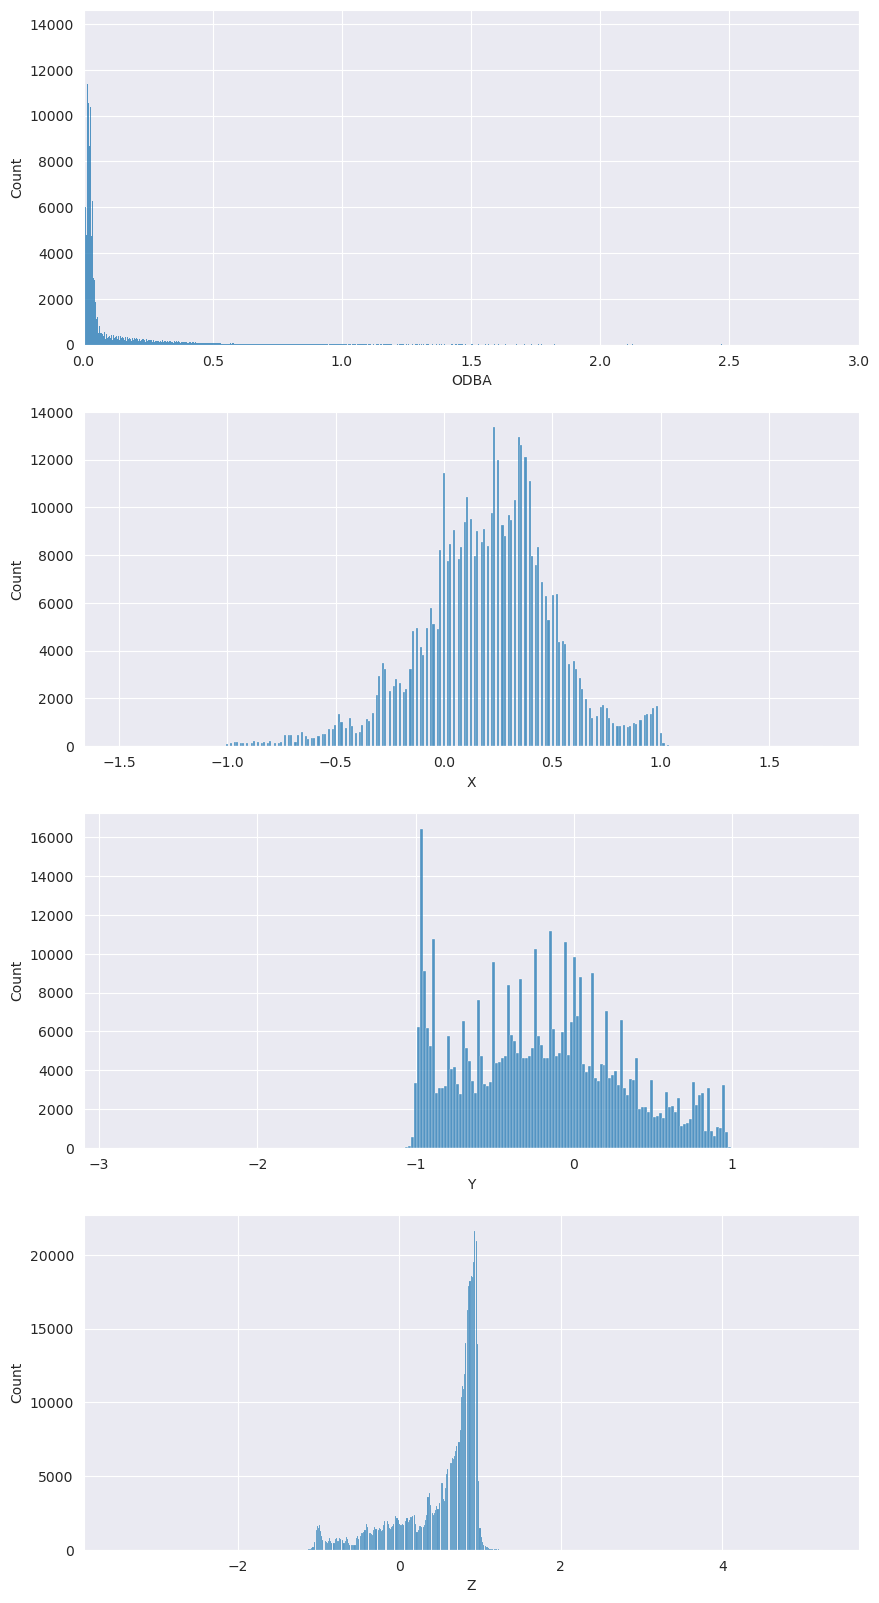

In [36]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

sns.histplot(x='ODBA', data=dataset1_crudo_dataframe, ax=axes[0])
sns.histplot(x='X', data=dataset1_crudo_dataframe, ax=axes[1])
sns.histplot(x='Y', data=dataset1_crudo_dataframe, ax=axes[2])
sns.histplot(x='Z', data=dataset1_crudo_dataframe, ax=axes[3])

# Add limit for ODBA plot
axes[0].set_xlim(0, 3)

#### Box plot

(0.0, 1.0)

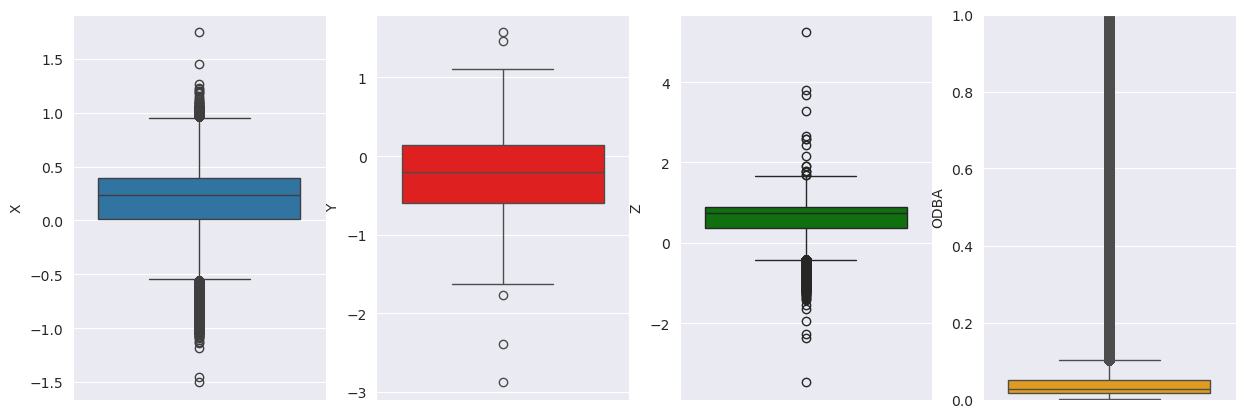

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(y='X', data=dataset1_crudo_dataframe, ax=axes[0], legend=True)
sns.boxplot(y='Y', data=dataset1_crudo_dataframe, color='red', ax=axes[1], legend=True)
sns.boxplot(y='Z', data=dataset1_crudo_dataframe, color='green', ax=axes[2], legend=True)
sns.boxplot(y='ODBA', data=dataset1_crudo_dataframe, color='orange', ax=axes[3], legend=True)

# Add limit for ODBA plot, ignoring peak values
axes[3].set_ylim(0, 1)


<Axes: ylabel='ODBA'>

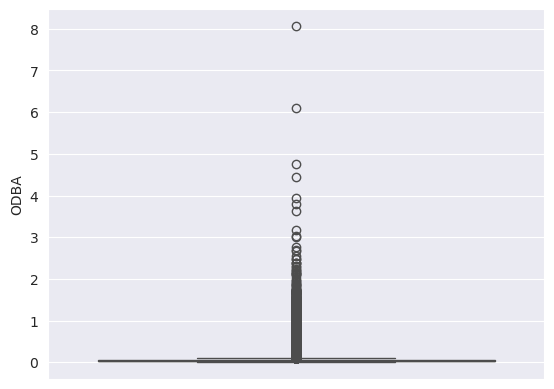

In [38]:
sns.boxplot(y='ODBA', data=dataset1_crudo_dataframe, color='orange', legend=True)


#### Scatter plots

<Axes: xlabel='ODBA', ylabel='z'>

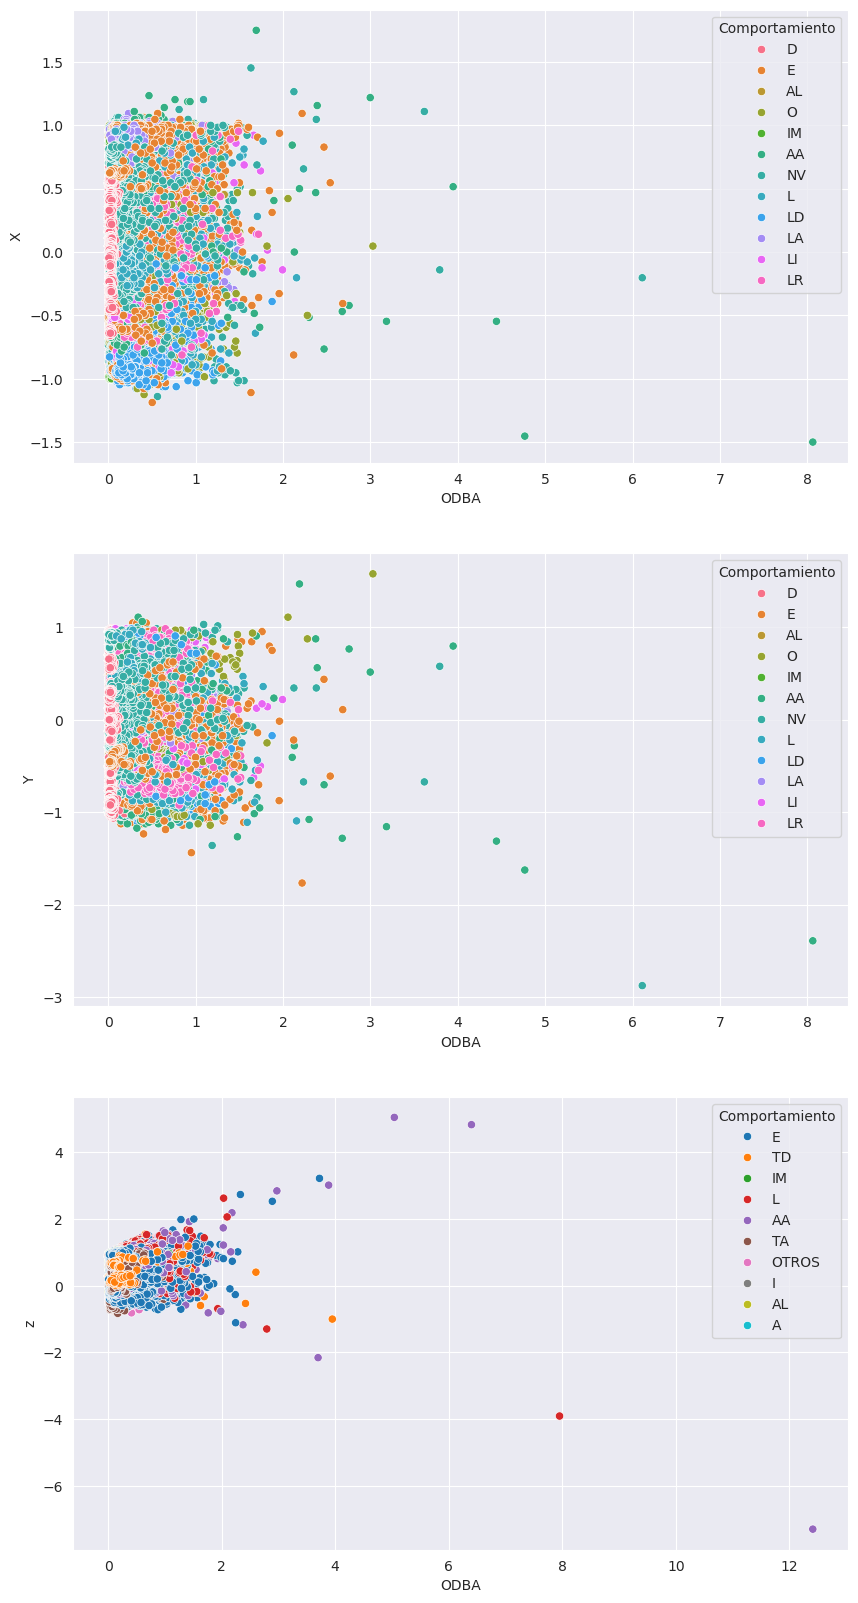

In [39]:
# Count
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

sns.scatterplot(x='ODBA', y='X', data=dataset1_crudo_dataframe, hue='Comportamiento', ax=axes[0])
sns.scatterplot(x='ODBA', y='Y', data=dataset1_crudo_dataframe, hue='Comportamiento', ax=axes[1])
sns.scatterplot(x='ODBA', y='z', data=dataset2_crudo_dataframe, hue='Comportamiento', ax=axes[2])



(-2.0, 2.0)

/opt/conda/envs/dev-tf/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/envs/dev-tf/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


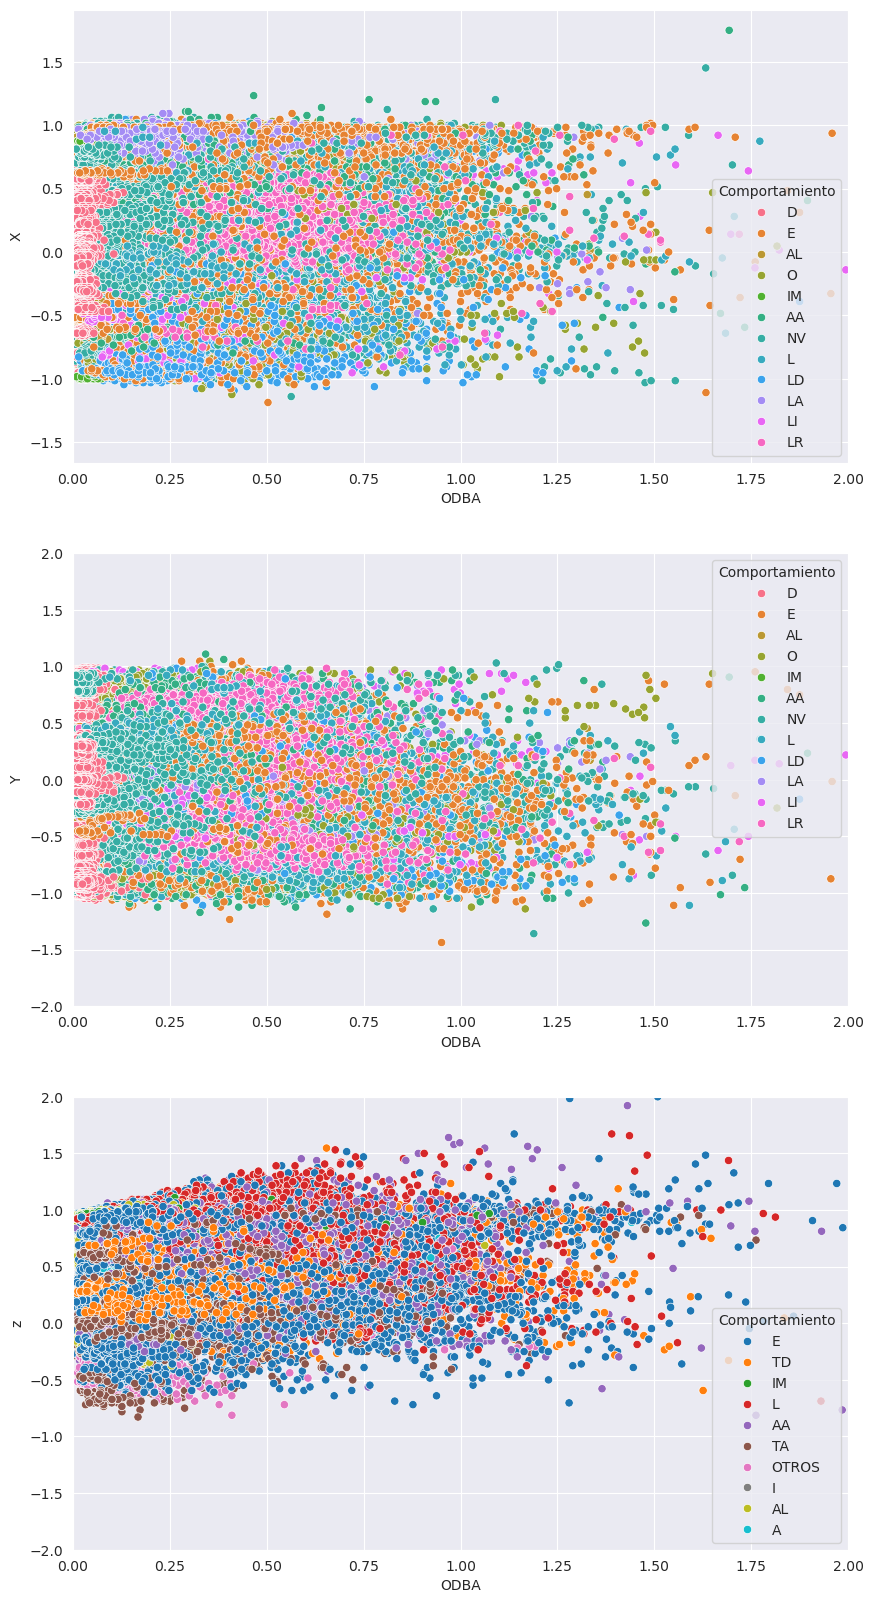

In [40]:
# Zoom para ODBA menor a 2
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

sns.scatterplot(x='ODBA', y='X', data=dataset1_crudo_dataframe, hue='Comportamiento', ax=axes[0])
sns.scatterplot(x='ODBA', y='Y', data=dataset1_crudo_dataframe, hue='Comportamiento', ax=axes[1])
sns.scatterplot(x='ODBA', y='z', data=dataset2_crudo_dataframe, hue='Comportamiento', ax=axes[2])

# Add limit for ODBA axis
axes[0].set_xlim(0, 2)
axes[1].set_xlim(0, 2)
axes[1].set_ylim(-2, 2)
axes[2].set_xlim(0, 2)
axes[2].set_ylim(-2, 2)

#### Violin plots

Text(0.5, 1.0, 'Dataset 1 - Valores de ODBA por Comportamiento')

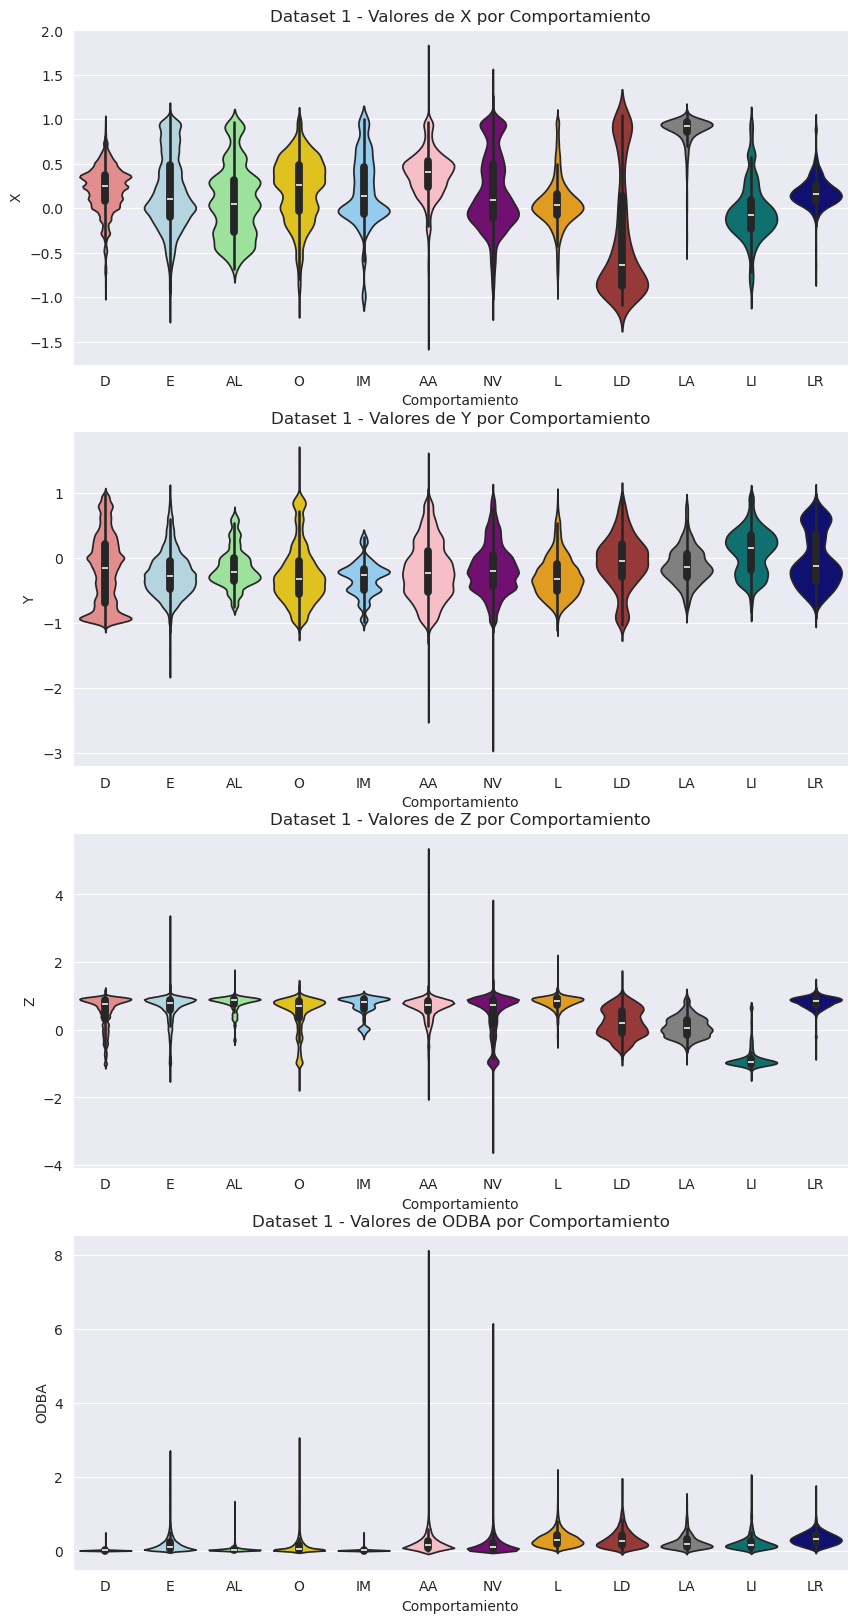

In [41]:
# Count plot of the column Name in dataset 1
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# 'D', 'E', 'AL', 'O', 'IM', 'AA', 'NV', 'L', 'LD', 'LA', 'LI', 'LR'

sns.violinplot(x='Comportamiento',
                y='X', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[0],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='Y', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[1],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='Z', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[2],
                legend=False
                )

sns.violinplot(x='Comportamiento',
                y='ODBA', 
                hue='Comportamiento',
                data=dataset1_crudo_dataframe,
                palette={ 'D': 'lightcoral', 'E': 'lightblue', 'AL': 'lightgreen', 'O': 'gold', 'IM': 'lightskyblue', 'AA': 'lightpink', 'NV':'purple', 'L':'orange', 'LD':'brown', 'LA':'gray', 'LI':'teal', 'LR':'navy'},
                ax=axes[3],
                legend=False
                )

# Adjust vertical spacing between the plots
# plt.subplots_adjust(hspace=1)

# Set the title for the plots
axes[0].set_title('Dataset 1 - Valores de X por Comportamiento')
axes[1].set_title('Dataset 1 - Valores de Y por Comportamiento')
axes[2].set_title('Dataset 1 - Valores de Z por Comportamiento')
axes[3].set_title('Dataset 1 - Valores de ODBA por Comportamiento')


## Generación de datasets - Tabla Resumen

Se procede a cargar y limpiar los datasets analizados para dejarlos en el formato que pueda utilizar la fase de entrenamiento de la red neuronal. 

- Normalización de columnas.
- Eliminación de columnas irrelevantes.
- Análisis de outliers y estrategia de corrección
- Generación de datasets por segundo (10 muestras)
- Generación de datasets por 5 segundos (50 muestras)

In [42]:
dataset1_normalizado = dataset1_crudo_dataframe.copy()
dataset2_normalizado = dataset2_crudo_dataframe.copy()

# Listar las columnas en ambos datasets
print(dataset1_normalizado.columns.to_list())
print(dataset2_normalizado.columns.to_list())

['UE', 'Nombre', 'Sexo', 'Etapa', 'Hora', 'Tiempo', 'X', 'Y', 'Z', 'Estado', 'Comportamiento', 'ODBA']
['UE', 'Nombre', 'Sexo', 'Fecha', 'Hora', 'Estado', 'Comportamiento', 'Comport 2', 'Posición', 'x', 'y', 'z', 'x prom/3seg', 'y prom/3seg', 'z prom/3seg', 'dif x', 'dif y ', 'dif z', 'abs dif x', 'abs dif y ', 'abs dif z ', 'ODBA']


In [43]:
# Descartar columnas no necesarias
dataset1_normalizado = dataset1_normalizado.drop(columns=['UE', 'Etapa', 'Estado', 'Tiempo'])
dataset2_normalizado = dataset2_normalizado.drop(columns=['UE', 'Estado', 'Comport 2', 'Posición', 'x prom/3seg', 'y prom/3seg', 'z prom/3seg', 'dif x', 'dif y ', 'dif z', 'abs dif x', 'abs dif y ', 'abs dif z '])

# Listar las columnas en ambos datasets
print(dataset1_normalizado.columns.to_list())
print(dataset2_normalizado.columns.to_list())

['Nombre', 'Sexo', 'Hora', 'X', 'Y', 'Z', 'Comportamiento', 'ODBA']
['Nombre', 'Sexo', 'Fecha', 'Hora', 'Comportamiento', 'x', 'y', 'z', 'ODBA']


In [44]:
# Function to generate time
def generate_time(group):
    n = len(group)
    seconds = n // 10
    remainder = n % 10
    time = [f"{s:02}:{r}" for s in range(seconds) for r in range(10)]
    if remainder > 0:
        time += [f"{seconds:02}:{r}" for r in range(remainder)]
    group['Hora'] = time
    return group

# Apply the function to each group
dataset1_normalizado = dataset1_normalizado.groupby('Nombre').apply(generate_time)

/tmp/ipykernel_625/6353041.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset1_normalizado = dataset1_normalizado.groupby('Nombre').apply(generate_time)


In [45]:
dataset1_normalizado.head(20)

Nombre   Sexo  Hora       X       Y       Z Comportamiento  \
Nombre                                                                      
Franco 155520  Franco  Macho  00:0  0.1250 -0.1406  1.0000              E   
       155521  Franco  Macho  00:1  0.0938 -0.1250  0.9688              E   
       155522  Franco  Macho  00:2  0.0938 -0.1406  0.9688              E   
       155523  Franco  Macho  00:3  0.0938 -0.1563  0.9531              E   
       155524  Franco  Macho  00:4  0.1094 -0.1250  0.9688              E   
       155525  Franco  Macho  00:5  0.0938 -0.1094  0.9531              E   
       155526  Franco  Macho  00:6  0.1094 -0.1094  0.9844              E   
       155527  Franco  Macho  00:7  0.1250 -0.1094  0.9688              E   
       155528  Franco  Macho  00:8  0.1094 -0.0938  0.9688              E   
       155529  Franco  Macho  00:9  0.1094 -0.0938  0.9531              E   
       155530  Franco  Macho  01:0  0.1250 -0.0938  0.9844              E   
       155531  Franco  Macho  01:1  0.1406 -0.0781  0.9531              E   
       155532  Franco  Macho  01:2  0.1719 -0.0938  0.9531              E   
       155533  Franco  Macho  01:3  0.1875 -0.0938  0.9688              E   
       155534  Franco  Macho  01:4  0.1875 -0.0469  0.9844              E   
       155535  Franco  Macho  01:5  0.1719 -0.0469  0.9375              E   
       155536  Franco  Macho  01:6  0.2344 -0.0781  0.9375              E   
       155537  Franco  Macho  01:7  0.2969 -0.0938  0.9219              E   
       155538  Franco  Macho  01:8  0.2500 -0.1875  0.9219              E   
       155539  Franco  Macho  01:9  0.1719 -0.1875  0.8906              E   

                   ODBA  
Nombre                   
Franco 155520  0.115073  
       155521  0.099473  
       155522  0.115073  
       155523  0.127647  
       155524  0.083873  
       155525  0.080747  
       155526  0.083873  
       155527  0.052673  
       155528  0.055727  
       155529  0.052600  
       155530  0.055727  
       155531  0.037100  
       155532  0.025527  
       155533  0.044253  
       155534  0.106753  
       155535  0.088027  
       155536  0.119327  
       155537  0.181727  
       155538  0.225473  
       155539  0.178673

#### Análisis de outliers

Existen distintas estrategias para resolver las medidas que tengan outliers significativos en algunos de sus datos. En un principio estaba considerando revisar esto debido a algunos valores de ODBA. Leyendo que vienen promediados acumulativos de los ultimos 3 segundos. Vamos a revisar los valores de ODBA.

In [46]:
print(dataset1_crudo_dataframe[dataset1_crudo_dataframe['ODBA'] > 2.5])


        UE    Nombre    Sexo Etapa     Hora  Tiempo       X       Y       Z  \
58433    6   Matilda  Hembra    A2  15:02.3      74 -0.5469 -1.3125  3.8125   
58442    6   Matilda  Hembra    A2  15:03.2      74  1.2188  0.5156 -0.9844   
59709    6   Matilda  Hembra    A2  25:03.9      88 -0.2031 -2.8750  2.5938   
59720    6   Matilda  Hembra    A2  25:05.0      88  1.1094 -0.6719 -3.4688   
187126   4    Franco   Macho     B  05:01.6      64 -1.4531 -1.6250  2.5938   
190617   4    Franco   Macho     B  15:08.7     102 -0.4688 -1.2813  1.6875   
200817   4    Franco   Macho     B  45:02.7     216  0.5156  0.7969 -1.9531   
213064   4    Franco   Macho    A2  10:03.4      64 -0.4219  0.7656  2.4375   
242998   3  Isabella  Hembra    A1  45:08.8     108 -0.1406  0.5781  3.6719   
285122   3  Isabella  Hembra    A2  40:00.2       1 -0.4063  0.1094  3.2813   
371709  10   Garrita  Hembra    A2  25:00.9      99 -0.5469 -1.1563  2.6563   
375018  10   Garrita  Hembra    A2  25:07.8     135 

Los valores altos tienen algunos valores contiguos también altos. Esto quizas pueda ser debido a la forma del cálculo del ODBA por periodo utilizado. A fines prácticos, lo vamos a tratar como una variable relevada y correctamente validada. Queda pendiente revisar las especificaciones técnicas del sensor para conocer si los valores de x, y y z se encuentran todos dentro de los rangos de salida.

Se procede a revisar el valor de las columna de salida por valores en en blanco y nan.

In [47]:
# Check for NaN values in dataset1
nan_values_dataset1 = dataset1_normalizado.isnull().sum().sum()

# Check if dataset1 is empty
empty_dataset1 = dataset1_normalizado.empty

# Check for NaN values in dataset2
nan_values_dataset2 = dataset2_normalizado.isnull().sum().sum()

# Check if dataset2 is empty
empty_dataset2 = dataset2_normalizado.empty

# Print the results
print("NaN values in dataset1:", nan_values_dataset1)
print("Is dataset1 empty:", empty_dataset1)
print("NaN values in dataset2:", nan_values_dataset2)
print("Is dataset2 empty:", empty_dataset2)

NaN values in dataset1: 1
Is dataset1 empty: False
NaN values in dataset2: 10
Is dataset2 empty: False


In [50]:
# Assuming df is your DataFrame2
nan_rows = dataset2_normalizado[dataset2_normalizado.isna().any(axis=1)]

# Get the indices of the rows before and after the NaN rows
before_indices = nan_rows.index - 1
after_indices = nan_rows.index + 1

# Remove indices that are out of bounds
before_indices = before_indices[before_indices >= 0]
after_indices = after_indices[after_indices < len(dataset2_normalizado)]

# Get the rows before and after the NaN rows
before_rows = dataset2_normalizado.loc[before_indices]
after_rows = dataset2_normalizado.loc[after_indices]

# Concatenate the before, NaN, and after rows
result = pd.concat([before_rows, nan_rows, after_rows])

# Sort the columns so that columns with NaN values come first
nan_cols = dataset2_normalizado.columns[dataset2_normalizado.isna().any()].tolist()
other_cols = [col for col in dataset2_normalizado.columns if col not in nan_cols]
result = result[nan_cols + other_cols]

# Print the result
print(result)

     Comportamiento    Nombre    Sexo      Fecha     Hora       x       y  \
4789             IM  Chaqueña  Hembra  8/22/2019  33:55.9  0.1406  0.1563   
4790            NaN  Chaqueña  Hembra  8/22/2019  33:56.0  0.1406  0.1563   
4791            NaN  Chaqueña  Hembra  8/22/2019  33:56.1  0.1406  0.1563   
4792            NaN  Chaqueña  Hembra  8/22/2019  33:56.2  0.1250  0.1563   
4793            NaN  Chaqueña  Hembra  8/22/2019  33:56.3  0.1250  0.1406   
4794            NaN  Chaqueña  Hembra  8/22/2019  33:56.4  0.1250  0.1406   
4795            NaN  Chaqueña  Hembra  8/22/2019  33:56.5  0.1250  0.1406   
4796            NaN  Chaqueña  Hembra  8/22/2019  33:56.6  0.1250  0.1563   
4797            NaN  Chaqueña  Hembra  8/22/2019  33:56.7  0.1250  0.1406   
4798            NaN  Chaqueña  Hembra  8/22/2019  33:56.8  0.1250  0.1406   
4790            NaN  Chaqueña  Hembra  8/22/2019  33:56.0  0.1406  0.1563   
4791            NaN  Chaqueña  Hembra  8/22/2019  33:56.1  0.1406  0.1563   

In [51]:
after_rows['Comportamiento'] = after_rows['Comportamiento'].fillna(method='ffill')

/tmp/ipykernel_625/2030864258.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  after_rows['Comportamiento'] = after_rows['Comportamiento'].fillna(method='ffill')


In [53]:
import pandas as pd

# Assuming the dataset 2 is stored in the variable "dataset2_crudo_dataframe"
# Replace "dataset2_crudo_dataframe" with the actual variable name if different

# Count the number of samples for each unique value in the "comportamiento" column
comportamiento_counts = dataset2_crudo_dataframe['Comportamiento'].value_counts()

# Find the value with the minimum count
comportamiento_least_samples = comportamiento_counts.idxmin()

# Print the value with the least amount of samples
print(comportamiento_least_samples)

# Print the whole row for column "comportamiento" value equal to "A"
print(dataset2_crudo_dataframe[dataset2_crudo_dataframe['Comportamiento'] == comportamiento_least_samples])

A
        UE    Nombre   Sexo      Fecha     Hora Estado Comportamiento  \
112800   5  Tucumano  Macho  8/20/2019  35:04.0      A              A   
112801   5  Tucumano  Macho  8/20/2019  35:04.1      A              A   
112802   5  Tucumano  Macho  8/20/2019  35:04.2      A              A   
112803   5  Tucumano  Macho  8/20/2019  35:04.3      A              A   
112804   5  Tucumano  Macho  8/20/2019  35:04.4      A              A   
112805   5  Tucumano  Macho  8/20/2019  35:04.5      A              A   
112806   5  Tucumano  Macho  8/20/2019  35:04.6      A              A   
112807   5  Tucumano  Macho  8/20/2019  35:04.7      A              A   
112808   5  Tucumano  Macho  8/20/2019  35:04.8      A              A   
112809   5  Tucumano  Macho  8/20/2019  35:04.9      A              A   
112810   5  Tucumano  Macho  8/20/2019  35:05.0      A              A   
112811   5  Tucumano  Macho  8/20/2019  35:05.1      A              A   
112812   5  Tucumano  Macho  8/20/2019  35:05.2  